# Drug Activity Prediction using SVM , Random forest and DeepChem

Prediction different assays activities based on their molecule structure

By: Khaled Yousef 

In [ ]:
# Installing Deepchem
# Installing conda

!pip install --pre deepchem
# Import deepchem just to check the version

# Importing required libraries and its utilities
import numpy as np

np.random.seed(123)
import tensorflow as tf

tf.random.set_seed(123)
import deepchem as dc
import pandas as pd
import matplotlib.pyplot as plot
from deepchem.molnet import load_tox21
from deepchem.models.graph_models import GraphConvModel
from rdkit import Chem
from sklearn.metrics import roc_auc_score
import argparse



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Split the training dataset by task and removing the -1 samples  to ease the processing for Graph convolutions classifications
whole_training_data = df = pd.read_csv("/content/drive/MyDrive/Drug Activity Challenge/data_train.csv")




task1_df = whole_training_data[['smiles','task1']]
task1_df.drop(task1_df[task1_df.task1 == -1].index,inplace = True)
task1_df = task1_df.reset_index(drop = True)
task1_df.to_csv('task1.csv')
task1_df

####

task2_df = whole_training_data[['smiles','task2']]
task2_df.drop(task2_df[task2_df.task2 == -1].index,inplace = True)
task2_df = task2_df.reset_index(drop = True)
task2_df.to_csv('task2.csv')
task2_df


##

task3_df = whole_training_data[['smiles','task3']]
task3_df.drop(task3_df[task3_df.task3 == -1].index,inplace = True)
task3_df = task3_df.reset_index(drop = True)
task3_df.to_csv('task3.csv')
task3_df


###

task4_df = whole_training_data[['smiles','task4']]
task4_df.drop(task4_df[task4_df.task4 == -1].index,inplace = True)
task4_df = task4_df.reset_index(drop = True)
task4_df.to_csv('task4.csv')
task4_df
###

task5_df = whole_training_data[['smiles','task5']]
task5_df.drop(task5_df[task5_df.task5 == -1].index,inplace = True)
task5_df = task5_df.reset_index(drop = True)
task5_df.to_csv('task5.csv')
task5_df

###
task6_df = whole_training_data[['smiles','task6']]
task6_df.drop(task6_df[task6_df.task6 == -1].index,inplace = True)
task6_df = task6_df.reset_index(drop = True)
task6_df.to_csv('task6.csv')
task6_df

###

task7_df = whole_training_data[['smiles','task7']]
task7_df.drop(task7_df[task7_df.task7 == -1].index,inplace = True)
task7_df = task7_df.reset_index(drop = True)
task7_df.to_csv('task7.csv')
task7_df

###

task8_df = whole_training_data[['smiles','task8']]
task8_df.drop(task8_df[task8_df.task8 == -1].index,inplace = True)
task8_df = task8_df.reset_index(drop = True)
task8_df.to_csv('task8.csv')
task8_df

###

task9_df = whole_training_data[['smiles','task9']]
task9_df.drop(task9_df[task9_df.task9 == -1].index,inplace = True)
task9_df = task9_df.reset_index(drop = True)
task9_df.to_csv('task9.csv')
task9_df

###

task10_df = whole_training_data[['smiles','task10']]
task10_df.drop(task10_df[task10_df.task10 == -1].index,inplace = True)
task10_df = task10_df.reset_index(drop = True)
task10_df.to_csv('task10.csv')
task10_df

###

task11_df = whole_training_data[['smiles','task11']]
task11_df.drop(task11_df[task11_df.task11 == -1].index,inplace = True)
task11_df = task11_df.reset_index(drop = True)
task11_df.to_csv('task11.csv')
task11_df




/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,smiles,task11
0,CC(=O)N(C)c1cccc(-c2ccnc3c(C(=O)c4cccs4)cnn23)c1,0
1,COc1cc(N)c(Cl)cc1C(=O)OCCCN1CCCCC1.Cl,0
2,CCCCNc1c(C(=O)OCC)cnc2c1cnn2CC,0
3,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1.Cl,1
4,CC1OC2(CCCCC2Oc2cccc(Cl)c2)N=C1O,0
...,...,...
11115,CC(C)(C)NC[C@@H](O)COc1nsnc1N1CCOCC1,0
11116,CCC[C@@]1(CCc2ccccc2)CC(O)=C([C@H](CC)c2cccc(N...,0
11117,N=C(O)c1cnc(C2CC2)[nH]1,0
11118,CN=C=O,0


In [ ]:
#Featurize the data

task1 = ['task1']
task2 = ['task2']
task3 = ['task3']
task4 = ['task4']
task5 = ['task5']
task6 = ['task6']
task7 = ['task7']
task8 = ['task8']
task9 = ['task9']
task10 = ['task10']
task11 = ['task11']

featurizer=dc.feat.ConvMolFeaturizer()

# load data and calculate the features for dataset

loader_1 = dc.data.CSVLoader(tasks=task1, smiles_field="smiles",featurizer=featurizer)
dataset_1=loader_1.featurize('/content/task1.csv')

loader_2 = dc.data.CSVLoader(tasks=task2, smiles_field="smiles",featurizer=featurizer)
dataset_2=loader_2.featurize('/content/task2.csv')

loader_3 = dc.data.CSVLoader(tasks=task3, smiles_field="smiles",featurizer=featurizer)
dataset_3=loader_3.featurize('/content/task3.csv')

loader_4 = dc.data.CSVLoader(tasks=task4, smiles_field="smiles",featurizer=featurizer)
dataset_4=loader_4.featurize('/content/task4.csv')

loader_5 = dc.data.CSVLoader(tasks=task5, smiles_field="smiles",featurizer=featurizer)
dataset_5=loader_5.featurize('/content/task5.csv')

loader_6 = dc.data.CSVLoader(tasks=task6, smiles_field="smiles",featurizer=featurizer)
dataset_6=loader_6.featurize('/content/task6.csv')

loader_7 = dc.data.CSVLoader(tasks=task7, smiles_field="smiles",featurizer=featurizer)
dataset_7=loader_7.featurize('/content/task7.csv')

loader_8 = dc.data.CSVLoader(tasks=task8, smiles_field="smiles",featurizer=featurizer)
dataset_8=loader_8.featurize('/content/task8.csv')

loader_9 = dc.data.CSVLoader(tasks=task9, smiles_field="smiles",featurizer=featurizer)
dataset_9=loader_9.featurize('/content/task9.csv')

loader_10 = dc.data.CSVLoader(tasks=task10, smiles_field="smiles",featurizer=featurizer)
dataset_10=loader_10.featurize('/content/task10.csv')

loader_11 = dc.data.CSVLoader(tasks=task11, smiles_field="smiles",featurizer=featurizer)
dataset_11=loader_11.featurize('/content/task11.csv')



 

smiles_field is deprecated and will be removed in a future version of DeepChem.Use feature_field instead.
/usr/local/lib/python3.7/dist-packages/deepchem/data/data_loader.py:163: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  "featurize() will be removed in DeepChem 3.0", FutureWarning)
smiles_field is deprecated and will be removed in a future version of DeepChem.Use feature_field instead.


In [ ]:
dataset = dataset_1



# define a transformer for data using only training subset!
transformers = [
                dc.trans.BalancingTransformer(dataset=dataset)]

# apply transformation to all datasets including the external 
for transformer in transformers:  
  dataset = transformer.transform(dataset)

In [ ]:
#Defining the Metrics

# define mean AUROC metrics for the classifier
metric = dc.metrics.Metric(
    dc.metrics.roc_auc_score, np.mean, mode="classification")

# define number of internal features
n_feat = 75

# define batch size during the training
batch_size = 32

# dropout 
n_dropout = 0.1



In [ ]:
#Here is the GraphConv portion

from deepchem.models import GraphConvModel

# define a splitter 
splitter = dc.splits.SingletaskStratifiedSplitter() #ScaffoldSplitter

# split dataset into train, test subsets (80% - 20%)
train_dataset, val_dataset= splitter.train_test_split(dataset_6, 
                                                       seed=80,
                                                       frac_train=0.8, 
                                                       verbose=False)
print('Full dataset samples : {}'.format(dataset_6.X.shape[0]))
print('Train dataset samples : {}'.format(train_dataset.X.shape[0]))
print('Validation dataset samples : {}'.format(val_dataset.X.shape[0]))

model = GraphConvModel(
    len(task6), batch_size=batch_size, mode='classification',
    dropout=n_dropout,
    # model_dir='/content/drive/My Drive/MyProjects/DeepChem/antivirals/models/oneSplitMoreEpochs',
    random_seed=42) # same seed here!
# check the error for optimal number of epochs
num_epochs = 25
     
losses = []
auroc_train = []
auroc_val = []

for i in range(num_epochs):
  loss = model.fit(train_dataset, nb_epoch=1, deterministic=True)
  print("Epoch %d loss: %f" % (i, loss))
  losses.append(loss)

  # print statistics
  print("Evaluating model")
  train_scores = model.evaluate(train_dataset, [metric], transformers)
  print("Training ROC-AUC Score: %f" % train_scores["mean-roc_auc_score"])
  val_scores = model.evaluate(val_dataset, [metric], transformers)
  print("Validation ROC-AUC Score: %f" % val_scores["mean-roc_auc_score"])

  auroc_train.append(train_scores["mean-roc_auc_score"])
  auroc_val.append(val_scores["mean-roc_auc_score"])


Full dataset samples : 11050
Train dataset samples : 8840
Validation dataset samples : 2210


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_25/graph_pool_51/Reshape_14:0", shape=(175,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_25/graph_pool_51/Reshape_13:0", shape=(175, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_25/graph_pool_51/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_25/graph_pool_51/Reshape_17:0", shape=(768,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_25/graph

Epoch 0 loss: 22.212144
Evaluating model
Training ROC-AUC Score: 0.531157
Validation ROC-AUC Score: 0.483773
Epoch 1 loss: 9.859675
Evaluating model
Training ROC-AUC Score: 0.674257
Validation ROC-AUC Score: 0.732067
Epoch 2 loss: 10.439037
Evaluating model
Training ROC-AUC Score: 0.750547
Validation ROC-AUC Score: 0.725167
Epoch 3 loss: 35.194679
Evaluating model
Training ROC-AUC Score: 0.805913
Validation ROC-AUC Score: 0.741470
Epoch 4 loss: 3.220647
Evaluating model
Training ROC-AUC Score: 0.803769
Validation ROC-AUC Score: 0.705755
Epoch 5 loss: 4.447469
Evaluating model
Training ROC-AUC Score: 0.821644
Validation ROC-AUC Score: 0.748256
Epoch 6 loss: 6.460313
Evaluating model
Training ROC-AUC Score: 0.873291
Validation ROC-AUC Score: 0.680467
Epoch 7 loss: 14.245310
Evaluating model
Training ROC-AUC Score: 0.857842
Validation ROC-AUC Score: 0.702912
Epoch 8 loss: 3.071784
Evaluating model
Training ROC-AUC Score: 0.855396
Validation ROC-AUC Score: 0.739346
Epoch 9 loss: 2.621143
E

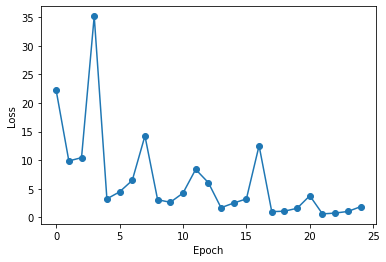

In [ ]:

# plot the errors
plot.ylabel("Loss")
plot.xlabel("Epoch")
x = range(num_epochs)
y = losses
plot.scatter(x, y)
plot.plot(x,y)
plot.show()



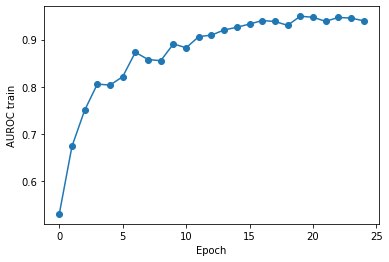

In [ ]:

# plot the auroc train

plot.ylabel("AUROC train")
plot.xlabel("Epoch")
x = range(num_epochs)
y = auroc_train
plot.scatter(x, y)
plot.plot(x,y)
plot.show()

In [1]:
#Reading the test data to prepare for predictions
whole_test_data = test_df = pd.read_csv("/content/drive/MyDrive/Drug Activity Challenge/smiles_test.csv")
whole_test_data.to_csv('test_task1.csv')

NameError: ignored

In [ ]:
#GEtting the molecules ready for prediction
smiles = test_df['smiles'].tolist()
mols = [Chem.MolFromSmiles(s) for s in smiles]
x = featurizer.featurize(mols)



In [2]:
#Saving the predictions on the first task to a separate CSV file
preds = model.predict_on_batch(x,transformers)
task1df_preds = pd.DataFrame(preds[:,0][:,1] , columns = ['task1']).to_csv('task1_preds.csv')



NameError: ignored

In [ ]:
#Gathering all the predictions into one file for submission


task1_preds_df = df = pd.read_csv("/content/task1_preds.csv")
task2_preds_df = df = pd.read_csv("/content/task2_preds.csv")
task3_preds_df = df = pd.read_csv("/content/task3_preds.csv")
task4_preds_df = df = pd.read_csv("/content/task4_preds.csv")
task5_preds_df = df = pd.read_csv("/content/task5_preds.csv")
task6_preds_df = df = pd.read_csv("/content/task6_preds.csv")
task7_preds_df = df = pd.read_csv("/content/task7_preds.csv")
task8_preds_df = df = pd.read_csv("/content/task8_preds.csv")
task9_preds_df = df = pd.read_csv("/content/task9_preds.csv")
task10_preds_df = df = pd.read_csv("/content/task10_preds.csv")
task11_preds_df = df = pd.read_csv("/content/task11_preds.csv")

frames = [task1_preds_df,task2_preds_df,task3_preds_df,task4_preds_df,task5_preds_df,task6_preds_df,task7_preds_df,task8_preds_df,task9_preds_df,task10_preds_df,task11_preds_df]

result = pd.concat(frames,axis = 1)
result =  result[['task1','task2','task3','task4','task5','task6','task7','task8','task9','task10','task11']]
print(result)

result.to_csv('result.csv')


             task1         task2     task3     task4         task5     task6  \
0     1.893660e-02  1.687613e-05  0.448330  0.718237  2.212372e-03  0.205099   
1     1.000000e+00  5.642028e-15  0.998580  0.024549  4.310642e-21  0.033133   
2     7.967982e-03  5.196416e-05  0.897674  0.028955  1.271797e-01  0.054374   
3     1.128658e-03  3.065134e-01  0.913400  0.001344  8.803573e-11  0.104767   
4     2.910174e-18  3.012651e-09  0.865378  0.008347  7.108838e-21  0.281405   
...            ...           ...       ...       ...           ...       ...   
5891  1.525340e-09  7.223643e-05  0.998673  0.052426  8.541948e-15  0.042283   
5892  8.255319e-10  9.052659e-01  0.934820  0.003052  4.337070e-12  0.000711   
5893  3.705291e-06  1.960848e-06  0.823188  0.025968  1.935352e-16  0.174177   
5894  1.000000e+00  1.580674e-15  0.879845  0.011599  9.003604e-21  0.035946   
5895  6.104921e-07  5.205805e-07  0.577471  0.008174  4.997238e-02  0.308028   

         task7     task8     task9    t